In [29]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
browser = Browser('chrome')

In [31]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [32]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [33]:
# Extract all rows of data
rows = html_soup.find_all('tr')

In [34]:
# Create an empty list
data_list =[]

# Loop through the scraped data to create a list of rows
for row in rows:
    
    # Find all the cells in the row
    cells = row.find_all('td')    
    
    # Extract the data from each cell
    data = [cell.text.strip() for cell in cells]
    
    # Append the row to the data_list
    if data:
        data_list.append(data)
    
# Print the list of rows
for row in data_list:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [35]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
# Create the DataFrame
mars_df = pd.DataFrame(data_list, columns=column_names)

In [36]:
# Confirm DataFrame was created successfully
print(mars_df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [37]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [38]:
# Change data types for data analysis

# Convert 'terrestrial_date' column to datetime data type
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert 'sol' column to int data type
mars_df['sol'] = mars_df['sol'].astype(int)

# Convert 'ls' column to int data type
mars_df['ls'] = mars_df['ls'].astype(int)

# Convert 'month' column to int data type
mars_df['month'] = mars_df['month'].astype(int)

# Convert 'min_temp' column to float data type
mars_df['min_temp'] = mars_df['min_temp'].astype(float)

# Convert 'pressure' column to float data type
mars_df['pressure'] = mars_df['pressure'].astype(float)


In [39]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [40]:
# 1. How many months are there on Mars?
month_counts = mars_df['month'].value_counts().sort_index()
# Print results
print(month_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [41]:
# 2. How many Martian days' worth of data are there?
num_days = mars_df['sol'].nunique()
# Print results
print(num_days)

1867


In [42]:
# 3. What is the average low temperature by month?
avg_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
print(avg_low_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


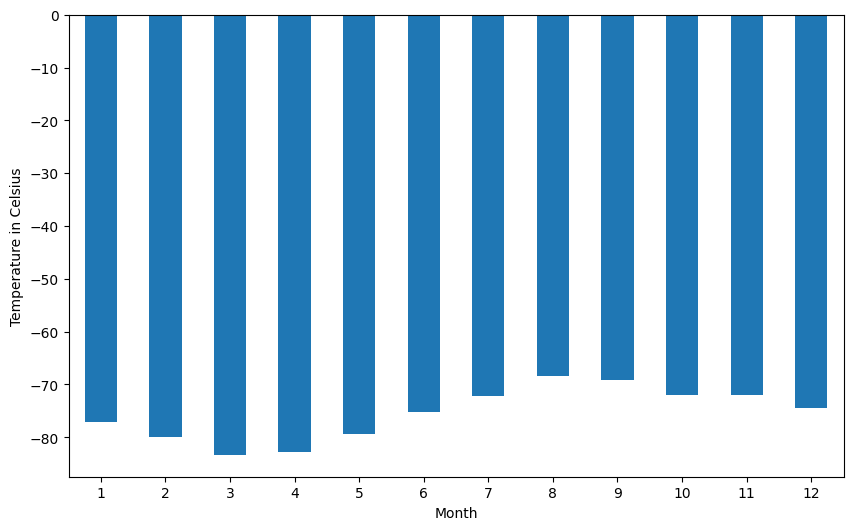

In [22]:
# Plot the average temperature by month
plt.figure(figsize=(10, 6))
avg_low_temp_by_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


<Axes: xlabel='month'>

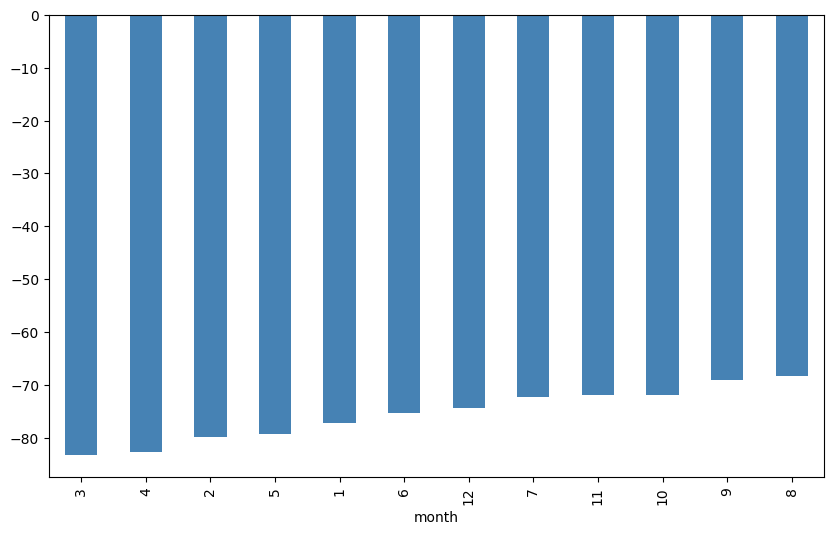

In [23]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = avg_low_temp_by_month.sort_values().index[0]
hottest_month = avg_low_temp_by_month.sort_values(ascending=False).index[0]

# Sort the average temperatures by month in ascending order
sorted_temperatures = avg_low_temp_by_month.sort_values()

# Create a revised bar graph
plt.figure(figsize=(10, 6))
sorted_temperatures.plot(kind='bar', color='steelblue')



In [24]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
print(avg_pressure_by_month)


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


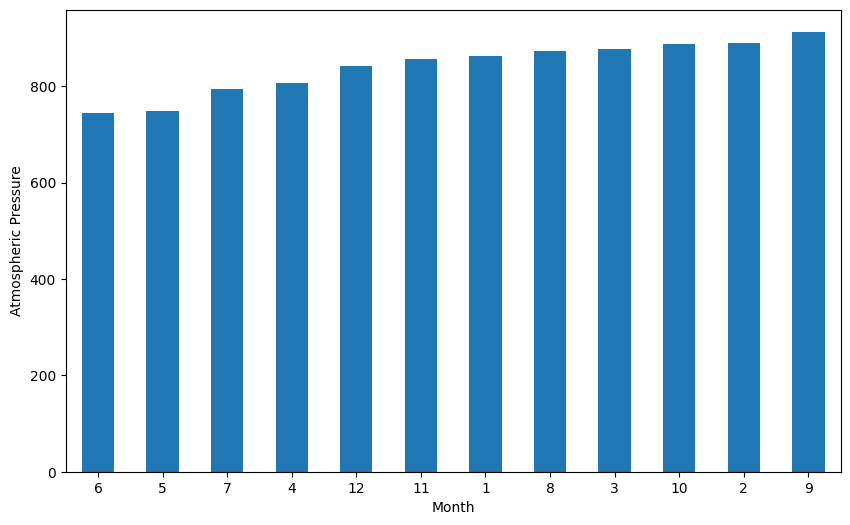

In [25]:
# Plot the average pressure by 
# Sort the average_pressure_by_month Series in ascending order
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values()

# Plot the sorted data
avg_pressure_by_month_sorted.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.show()


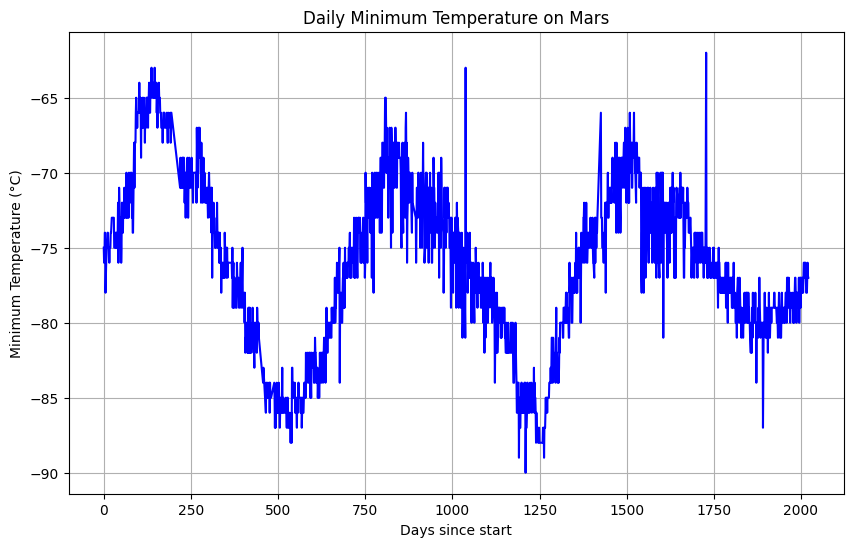

In [48]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate the number of days since the start of the dataset
mars_df['days_since_start'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days

# Sort the data by 'terrestrial_date'
mars_df = mars_df.sort_values('terrestrial_date')

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(mars_df['days_since_start'], mars_df['min_temp'], color='blue')
plt.xlabel('Days since start')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Daily Minimum Temperature on Mars')
plt.grid(True)
plt.show()




In [27]:
# Write the data to a CSV

In [28]:
browser.quit()